In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

# 读取训练集测试集

参考链接 https://www.kaggle.com/code/prasadposture121/financial-distress-prediction

In [2]:
train_df = pd.read_csv("./data/cs-training.csv")
print(train_df.shape)
train_df.head()

(150000, 12)


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
test_df = pd.read_csv("./data/cs-test.csv")
print(test_df.shape)
test_df.head()

(101503, 12)


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


训练集测试集基本状况查看，其中 `SeriousDlqin2yrs` 就是标签列。

In [4]:
# 标签列
train_df['SeriousDlqin2yrs'].unique()

array([1, 0])

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            101503 non-null  int64  
 1   SeriousDlqin2yrs                      0 non-null       float64
 2   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 3   age                                   101503 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 5   DebtRatio                             101503 non-null  float64
 6   MonthlyIncome                         81400 non-null   float64
 7   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 8   NumberOfTimes90DaysLate               101503 non-null  int64  
 9   NumberRealEstateLoansOrLines          101503 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 11  

## Stastical Information

In [7]:
train_df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [8]:
test_df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,101503.000000,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,50752.000000,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,29301.536524,NaN,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,1.000000,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25376.500000,NaN,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,50752.000000,NaN,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,76127.500000,NaN,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,101503.000000,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


标签列，可以看出 0 的数量远大于 1 ，对于这样的情况来说我们的模型很不好应对这样的不平衡情况，所以需要对 0 这个标签降采样。

In [9]:
train_df['SeriousDlqin2yrs'].value_counts()

SeriousDlqin2yrs
0    139974
1     10026
Name: count, dtype: int64

In [10]:
train0 = train_df[train_df['SeriousDlqin2yrs']==0].sample(frac=0.06684)
train1 = train_df[train_df['SeriousDlqin2yrs']==1].copy()
train_df = pd.concat([train0, train1], axis=0)
train_df['SeriousDlqin2yrs'].value_counts()

SeriousDlqin2yrs
1    10026
0     9356
Name: count, dtype: int64

## 数据分布

数据分布的查看，这里我们进行画图查看

In [25]:
# 选择数字列
Attributes= ['RevolvingUtilizationOfUnsecuredLines', 'age',
              'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
              'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
              'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
              'NumberOfDependents']

In [40]:
# 由于数据有很多异常值，所以我们在两倍标准差下放缩数据

def normalizer(x,df):
    upper_boundary=df[x].mean() + 2*df[x].std()
    lower_boundary=df[x].mean() - 2*df[x].std()
    max_att=df[x].max()
    min_att=df[x].min()
    return {'Attribute':x, 'upper_boundary': upper_boundary, 'lower_boundary': lower_boundary, 
           'max_att':max_att, 'min_att':min_att }

In [42]:
# 得到放缩后的数据
train_limits = pd.DataFrame([normalizer(x, train_df) for x in Attributes])
train_limits

,Attribute,upper_boundary,lower_boundary,max_att,min_att
0,RevolvingUtilizationOfUnsecuredLines,443.077177,-430.939701,22000.0,0.0
1,age,77.806980,20.571825,101.0,21.0
2,NumberOfTime30-59DaysPastDueNotWorse,18.614109,-15.917173,98.0,0.0
3,DebtRatio,5803.612481,-5131.520439,329664.0,0.0
4,MonthlyIncome,63112.374907,-50186.872865,3008750.0,0.0
5,NumberOfOpenCreditLinesAndLoans,18.951993,-2.577418,57.0,0.0
6,NumberOfTimes90DaysLate,18.401292,-16.148377,98.0,0.0
7,NumberRealEstateLoansOrLines,3.537132,-1.533623,29.0,0.0
8,NumberOfTime60-89DaysPastDueNotWorse,18.216563,-16.244321,98.0,0.0
9,NumberOfDependents,3.167789,-1.482119,8.0,0.0


In [43]:
test_limits = pd.DataFrame([normalizer(x, test_df) for x in Attributes])
test_limits

,Attribute,upper_boundary,lower_boundary,max_att,min_att
0,RevolvingUtilizationOfUnsecuredLines,397.622078,-387.002077,21821.0,0.0
1,age,81.964949,22.845924,104.0,21.0
2,NumberOfTime30-59DaysPastDueNotWorse,9.530745,-8.623205,98.0,0.0
3,DebtRatio,3609.665483,-2920.715442,268326.0,0.0
4,MonthlyIncome,79872.236339,-66162.165160,7727000.0,0.0
5,NumberOfOpenCreditLinesAndLoans,18.741714,-1.834687,85.0,0.0
6,NumberOfTimes90DaysLate,9.328408,-8.735026,98.0,0.0
7,NumberRealEstateLoansOrLines,3.233580,-1.207433,37.0,0.0
8,NumberOfTime60-89DaysPastDueNotWorse,9.277472,-8.736838,98.0,0.0
9,NumberOfDependents,3.042603,-1.504510,43.0,0.0


## 计算相关性

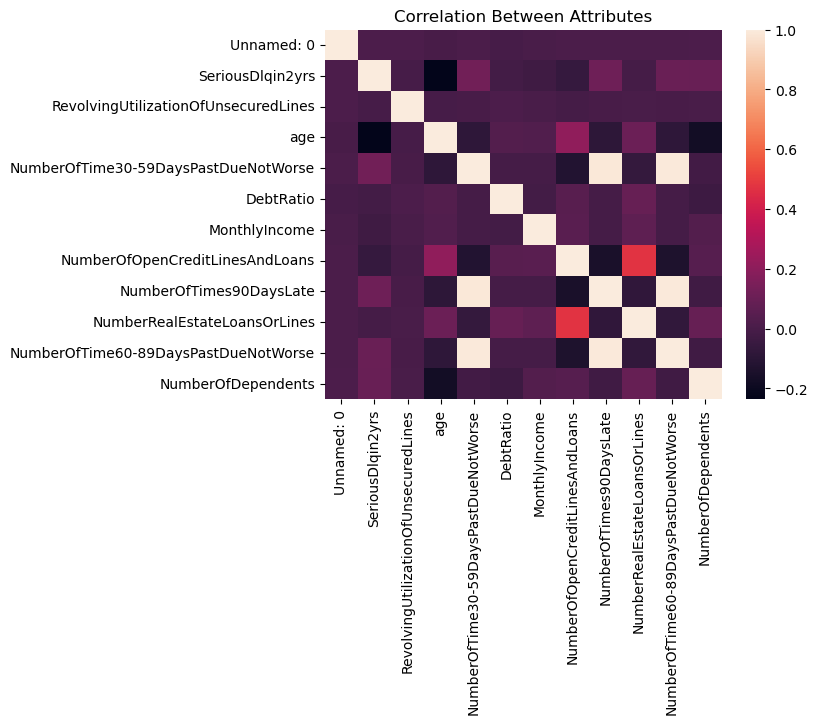

In [44]:
sns.heatmap(train_df.corr())
plt.title('Correlation Between Attributes');

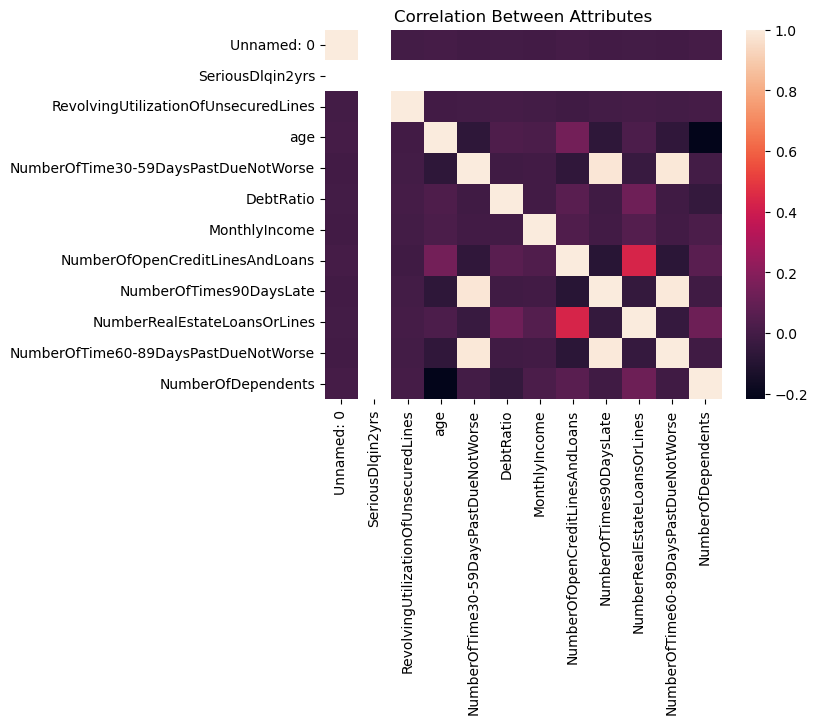

In [45]:
sns.heatmap(test_df.corr())
plt.title('Correlation Between Attributes');

# 准备输入和标签

In [46]:
input_cols = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']
target_col = 'SeriousDlqin2yrs'

In [47]:
inputs = train_df[input_cols].copy()
targets = train_df[target_col].copy()

In [48]:
test_inputs = test_df[input_cols].copy()

## 缺失值填充

参考 [缺失值处理：SimpleImputer](https://blog.csdn.net/qq_43965708/article/details/115625768)

In [50]:
from sklearn.impute import SimpleImputer

In [51]:
# 将所有缺失的数字填充中位数
# mean 平均数
# median 中位数
# most_frequent 众数
# constant 自定义数字 ，后面要写比如 fill_value=666


imputer = SimpleImputer(strategy = 'median').fit(train_df[input_cols])

In [52]:
# 为训练集和测试集填充
inputs[input_cols] = imputer.transform(inputs[input_cols])
test_inputs[input_cols] = imputer.transform(test_inputs[input_cols])

In [53]:
# 检查是否成功填充完毕
inputs[input_cols].isna().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [54]:
test_inputs[input_cols].isna().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

## 放缩数字特征

这里采用 MinMaxScaler 放缩试试

In [55]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(train_df[input_cols])

In [56]:
inputs[input_cols] = scaler.transform(inputs[input_cols])
test_inputs[input_cols] = scaler.transform(test_inputs[input_cols])

In [57]:
inputs.describe().loc[['min', 'max']]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [58]:
test_inputs.describe().loc[['min', 'max']]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
min,0.000000,0.0000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000
max,0.991864,1.0375,1.0,0.813938,2.568176,1.491228,1.0,1.275862,1.0,5.375


In [59]:
inputs.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
94650,0.000003,0.4250,0.00000,6.057588e-07,0.002631,0.315789,0.000000,0.068966,0.000000,0.125
135809,0.000024,0.2125,0.00000,1.403463e-06,0.000970,0.105263,0.000000,0.034483,0.000000,0.250
59648,0.000021,0.3375,0.00000,1.592440e-05,0.002493,0.456140,0.000000,0.068966,0.000000,0.250
90726,0.000002,0.5250,0.00000,1.201169e-06,0.000744,0.140351,0.000000,0.034483,0.000000,0.000
142377,0.000045,0.2375,0.05102,5.041535e-07,0.003689,0.070175,0.010204,0.000000,0.010204,0.000


# 开始建模

现在我们开始建模。

## 使用决策树建模

首先使用最简单的决策树建模。

In [60]:
# 训练集测试集拆分
from sklearn.model_selection import train_test_split


X_train, X_val, train_targets, val_targets = train_test_split(inputs, targets, test_size=0.25)

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
model = DecisionTreeClassifier(random_state=42)
#fitting the model
model.fit(X_train, train_targets)

DecisionTreeClassifier(random_state=42)

In [63]:
# 训练结果，这里我们用 x train试试
train_preds = model.predict(X_train)
train_preds

array([0, 0, 0, ..., 1, 1, 0])

In [64]:
# 也可以是概率
train_probs = model.predict_proba(X_train)
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [65]:
# 打印准确率
from sklearn.metrics import accuracy_score, confusion_matrix

# 在训练集上自然是接近100%，但是我们要在测试集上测试
accuracy_score(train_targets, train_preds)

0.9995184369840396

In [66]:
# 很明显在测试集上没有这么理想，说明我们已经过拟合了
model.score(X_val, val_targets)

0.6983078827899298

### 决策树可视化

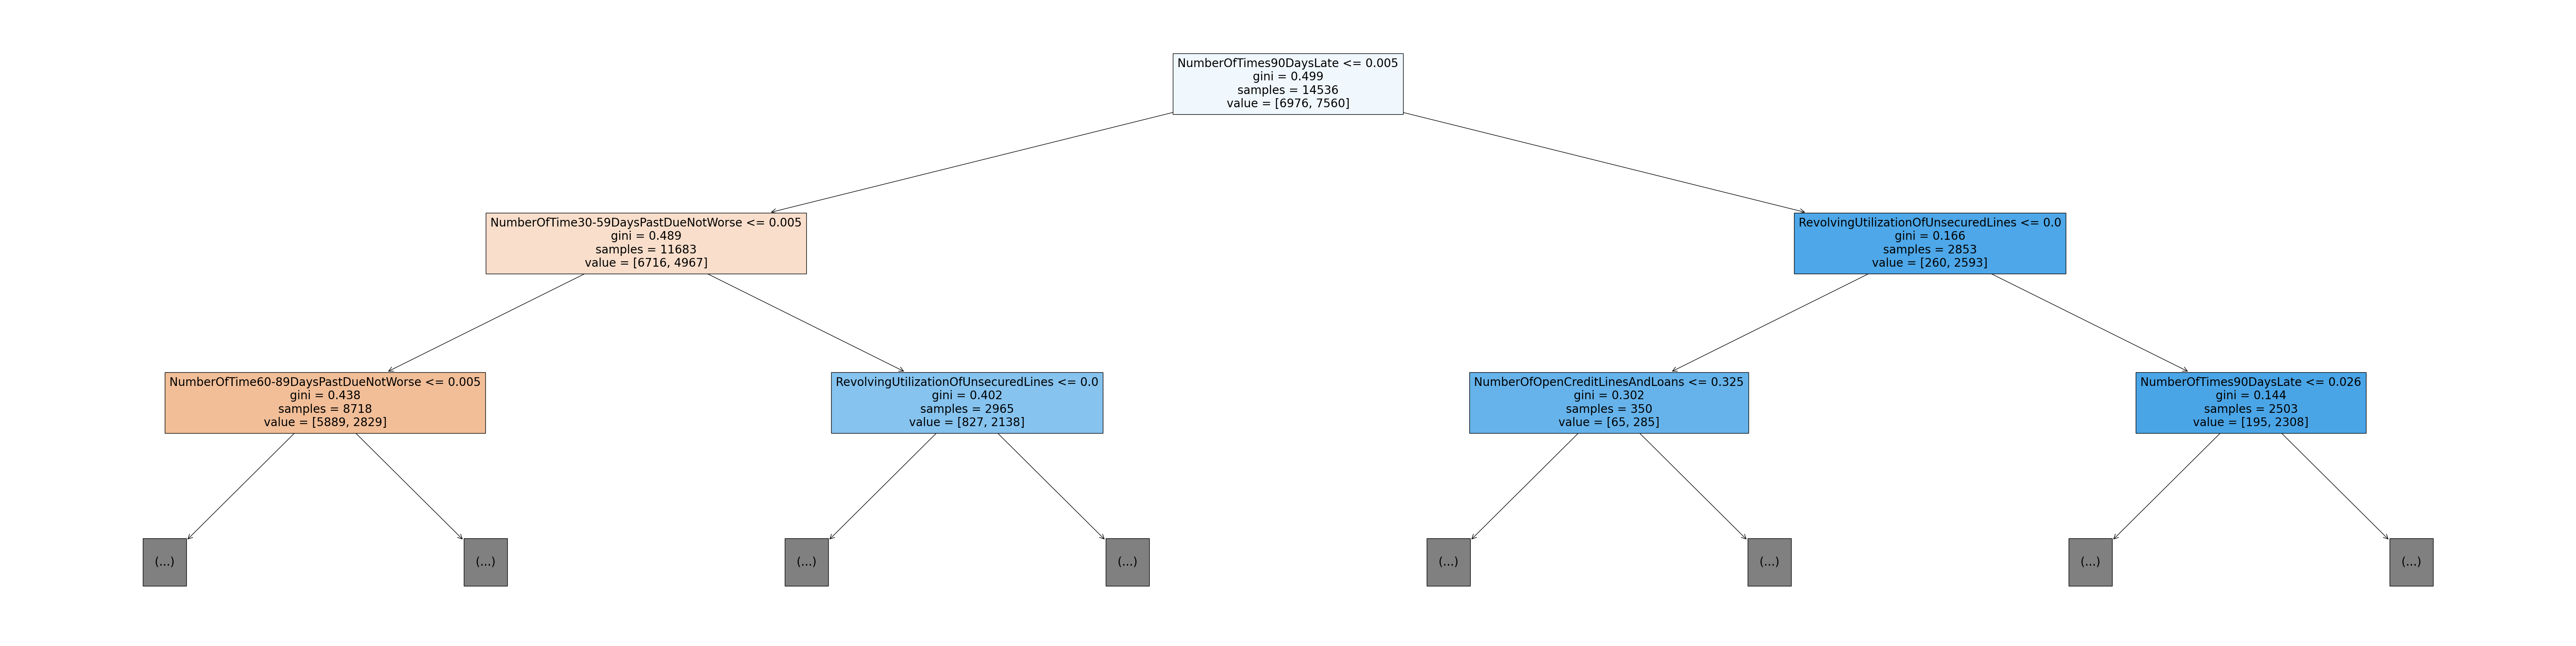

In [71]:
from sklearn.tree import plot_tree, export_text

plt.figure(figsize=(80,20))
plot_tree(model, feature_names=list(X_train.columns), max_depth=2, filled=True);

In [72]:
# 树的最大深度有32
model.tree_.max_depth

32

In [73]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- NumberOfTimes90DaysLate <= 0.01
|   |--- NumberOfTime30-59DaysPastDueNotWorse <= 0.01
|   |   |--- NumberOfTime60-89DaysPastDueNotWorse <= 0.01
|   |   |   |--- age <= 0.43
|   |   |   |   |--- RevolvingUtilizationOfUnsecuredLines <= 0.00
|   |   |   |   |   |--- NumberOfOpenCreditLinesAndLoans <= 0.15
|   |   |   |   |   |   |--- RevolvingUtilizationOfUnsecuredLines <= 0.00
|   |   |   |   |   |   |   |--- age <= 0.09
|   |   |   |   |   |   |   |   |--- NumberOfOpenCreditLinesAndLoans <= 0.13
|   |   |   |   |   |   |   |   |   |--- NumberOfDependents <= 0.06
|   |   |   |   |   |   |   |   |   |   |--- MonthlyIncome <= 0.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- MonthlyIncome >  0.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 11
|   |   |   |   |   |   |   |   |   |--- NumberOfDependents >  0.06
|   |   |   |   |   |   |   |   |   |   |--- age <= 0.07
|   |   |   |   |   |   |   |   

## 特征重要性

输出决策树的特征重要性

In [74]:
model.feature_importances_

array([0.1960652 , 0.12661167, 0.1050777 , 0.09972843, 0.13403064,
       0.08570357, 0.14983841, 0.03073608, 0.0345404 , 0.03766789])

In [75]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [76]:
importance_df.head(10)

,feature,importance
0,RevolvingUtilizationOfUnsecuredLines,0.196065
6,NumberOfTimes90DaysLate,0.149838
4,MonthlyIncome,0.134031
1,age,0.126612
2,NumberOfTime30-59DaysPastDueNotWorse,0.105078
3,DebtRatio,0.099728
5,NumberOfOpenCreditLinesAndLoans,0.085704
9,NumberOfDependents,0.037668
8,NumberOfTime60-89DaysPastDueNotWorse,0.034540
7,NumberRealEstateLoansOrLines,0.030736


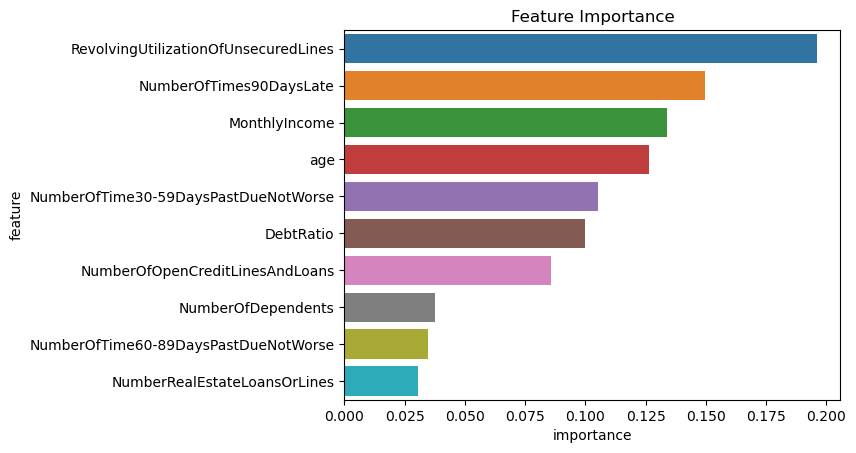

In [77]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## Hyperparameter Tuning

超参数调整